## **Imports**

In [5]:
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

## **Paths & Global Variables**

In [2]:
ROOT_PATH = r"C:\Users\mario\OneDrive\Documents\Work\Side Hustles\Kaggle\titanic"

import sys

sys.path.append(ROOT_PATH)

from titanic.config import PROCESSED_DATA_DIR, MODELS_DIR

2025-02-24 11:28:37.938 | INFO     | titanic.config:<module>:9 - PROJ_ROOT path is: C:\Users\mario\OneDrive\Documents\Work\Side Hustles\Kaggle\titanic


## **Reading Data**

In [3]:
os.chdir(PROCESSED_DATA_DIR)

features_selected = pd.read_json("dtree_features.json").index.to_list()

X_train = pd.read_parquet("X_train.parquet", columns=features_selected)
y_train = pd.read_parquet("y_train.parquet")

X_test = pd.read_parquet("X_val.parquet", columns=features_selected)
y_test = pd.read_parquet("y_val.parquet")

# **Decision Trees**

## **Model Fitting**

In [4]:
dtree = DecisionTreeClassifier()
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

## **Hyperparameter Tuning**

In [6]:
grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [1, 2, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["auto", "sqrt", "log2"],
}

In [7]:
clf = GridSearchCV(dtree, grid, cv=10, scoring="roc_auc")
clf.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'n_jobs': None,
 'param_grid': {'criterion': ['gini', 'entropy'],
  'splitter': ['best', 'random'],
  'max_depth': [1, 2, 5, 10],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 5],
  'max_features': ['auto', 'sqrt', 'log2']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'roc_auc',
 'verbose': 0}

In [8]:
clf.fit(X_train, y_train.values.ravel())
best_model = clf.best_estimator_
print(best_model)
print(clf.best_params_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=5)
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'best'}


c:\Users\mario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1440 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File 

### **Visualizing Decision Trees**

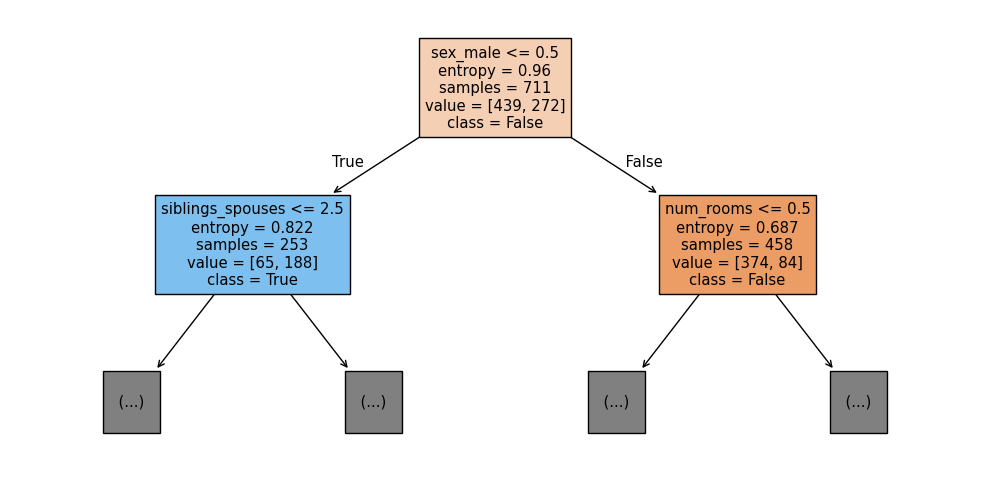

In [16]:
plt.figure(figsize=(10, 5))
tree.plot_tree(
    best_model,
    feature_names=X_train.columns,
    max_depth=1,
    class_names=["False", "True"],
    label="all",
    filled=True,
)
plt.tight_layout()
plt.show()

In [17]:
print(tree.export_text(best_model, feature_names=X_train.columns))

|--- sex_male <= 0.50
|   |--- siblings_spouses <= 2.50
|   |   |--- passenger_class_ord <= 0.50
|   |   |   |--- fare_log <= 3.19
|   |   |   |   |--- num_rooms <= 0.50
|   |   |   |   |   |--- parents_children <= 0.50
|   |   |   |   |   |   |--- fare_log <= 2.18
|   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |--- fare_log >  2.18
|   |   |   |   |   |   |   |--- title_lcode <= 11.00
|   |   |   |   |   |   |   |   |--- fare_log <= 2.38
|   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |--- fare_log >  2.38
|   |   |   |   |   |   |   |   |   |--- age_min_max <= 0.25
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |   |--- age_min_max >  0.25
|   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |--- title_lcode >  11.00
|   |   |   |   |   |   |   |   |--- fare_log <= 2.83
|   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |

## **Model Testing**

In [18]:
y_predicted = best_model.predict(X_test)
y_predicted_probs = best_model.predict_proba(X_test)[:, 1]

In [19]:
y_predicted_df = pd.DataFrame(y_predicted, columns=["predicted"], index=X_test.index)
y_predicted_probs_df = pd.DataFrame(
    y_predicted_probs, columns=["probability"], index=X_test.index
)
y_predicted_df = pd.concat([y_predicted_df, y_predicted_probs_df], axis=1)
y_predicted_df.head()

,predicted,probability
passenger_id,,
161,False,0.100000
127,False,0.107317
429,False,0.107317
423,False,0.107317
566,False,0.000000


## **Evaluation Metrics**

In [20]:
best_score = clf.best_score_
test_score = clf.score(X_test, y_test)
print(best_score)
print(test_score)

0.8592975715068738
0.8531417112299464


In [21]:
test_conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, y_predicted),
    index=["actual no", "actual yes"],
    columns=["predicted no", "predicted yes"],
)

test_conf_matrix

,predicted no,predicted yes
actual no,95,15
actual yes,23,45


In [22]:
metrics_dict = {
    "Accuracy": accuracy_score(y_test, y_predicted),
    "Precision": precision_score(y_test, y_predicted),
    "Recall": recall_score(y_test, y_predicted),
    "F1 Score": f1_score(y_test, y_predicted),
}

metrics_df = pd.DataFrame(
    metrics_dict.values(), index=metrics_dict.keys(), columns=["Value"]
)

roc_auc = roc_auc_score(y_test, y_predicted_probs)
gini = 2 * roc_auc - 1

metrics_df.loc["ROC AUC"] = roc_auc
metrics_df.loc["Gini"] = gini

metrics_df

,Value
Accuracy,0.786517
Precision,0.750000
Recall,0.661765
F1 Score,0.703125
ROC AUC,0.853142
Gini,0.706283


## **Feature Importance**

C:\Users\mario\AppData\Local\Temp\ipykernel_12888\2751919819.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='Importance', ylabel='Feature'>

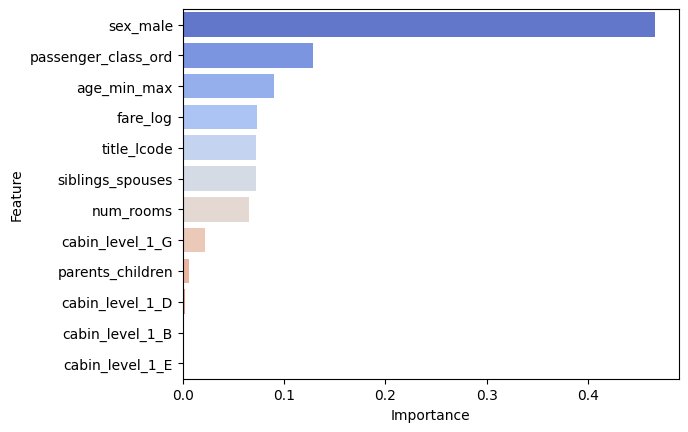

In [29]:
import seaborn as sns

coefficients_df = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": best_model.feature_importances_}
)

sns.barplot(
    x="Importance",
    y="Feature",
    data=coefficients_df.sort_values("Importance", ascending=False),
    palette="coolwarm",
)

## **Model & Prediction Export**

In [23]:
os.chdir(MODELS_DIR)
# Save model
joblib.dump(best_model, "dtree-model.joblib")
y_predicted_df.to_parquet("dtree-y_predicted.parquet")